In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt

# Classification MLP

In [2]:
print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print("Features")
print("-------------")
print(X_train_full.shape)
print(X_train_full.dtype)
print()
print("Labels")
print("-------------")
print(y_train_full.shape)
print(y_train_full.dtype)

Features
-------------
(60000, 28, 28)
uint8

Labels
-------------
(60000,)
uint8


In [5]:
X_dev, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_dev, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

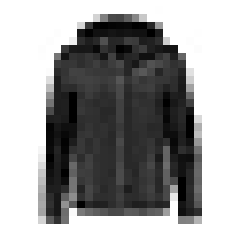

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

In [10]:
model = models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(300, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer("dense") is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()

print("Weights")
print("=====================")
print(weights)
print("shape")
print("-------")
print(weights.shape)
print()
print("Biases")
print("=====================")
print(biases)
print("shape")
print("-------")
print(biases.shape)

Weights
[[ 0.02577612  0.04790185  0.00603938 ... -0.06085365 -0.01476768
  -0.01629138]
 [-0.03855897 -0.04889926 -0.00794454 ...  0.05733638  0.05896617
   0.00654405]
 [-0.02659064  0.03610856  0.04346117 ... -0.01680814 -0.03830163
   0.07050563]
 ...
 [ 0.01507739 -0.04708533 -0.07290577 ...  0.01878718 -0.05270511
  -0.00966296]
 [ 0.0134976   0.06790164 -0.03902479 ...  0.04978847 -0.04062485
  -0.00903367]
 [ 0.03621148 -0.00819366  0.01145826 ...  0.06179696 -0.02288953
   0.04593093]]
shape
-------
(784, 300)

Biases
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [16]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.02),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [17]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_dev, y_dev))

Epoch 1/30
1719/1719 [==============================] - 2s 994us/step - loss: 0.6286 - sparse_categorical_accuracy: 0.7863 - val_loss: 0.5226 - val_sparse_categorical_accuracy: 0.8072
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4484 - sparse_categorical_accuracy: 0.8421 - val_loss: 0.4325 - val_sparse_categorical_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 2s 926us/step - loss: 0.4031 - sparse_categorical_accuracy: 0.8579 - val_loss: 0.3892 - val_sparse_categorical_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 1s 871us/step - loss: 0.3751 - sparse_categorical_accuracy: 0.8672 - val_loss: 0.3872 - val_sparse_categorical_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 1s 818us/step - loss: 0.3538 - sparse_categorical_accuracy: 0.8741 - val_loss: 0.3576 - val_sparse_categorical_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 1s 828us/step - loss: 0.33

In [18]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [19]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

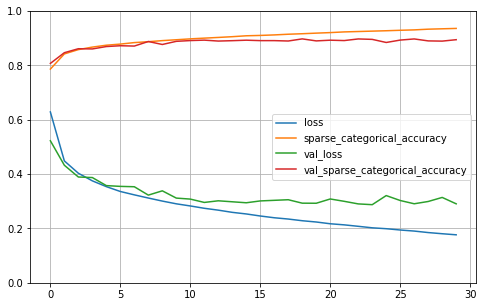

In [20]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 474us/step - loss: 0.3241 - sparse_categorical_accuracy: 0.8897


[0.32407140731811523, 0.8896999955177307]

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
import numpy as np
y_predict = np.argmax(y_proba, axis=1)
print(y_predict)
print(np.array(class_names)[y_predict])
y_new = y_test[:3]
print(f"{y_new} - Correct Prediction")

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
[9 2 1] - Correct Prediction


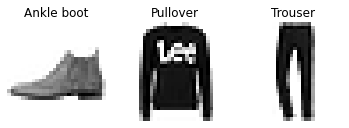

In [26]:
plt.figure()
for i, image in enumerate(X_new):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_test[i]], fontsize=12)
plt.show()

# Regression MLP

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # no activation function
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

c:\Users\jens\main\learn\google_coral_ml\python\env\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
Epoch 1/20
363/363 [==============================] - 1s 925us/step - loss: 3.5254 - val_loss: 0.9524
Epoch 2/20
363/363 [==============================] - 0s 472us/step - loss: 0.7216 - val_loss: 0.5624
Epoch 3/20
363/363 [==============================] - 0s 638us/step - loss: 0.5623 - val_loss: 0.5029
Epoch 4/20
363/363 [==============================] - 0s 503us/step - loss: 0.5241 - val_loss: 0.4982
Epoch 5/20
363/363 [==============================] - 0s 486us/step - loss: 0.5021 - val_loss: 0.4561
Epoch 6/20
363/363 [==============================] - 0s 481us/step - loss: 0.4849 - val_loss: 0.4472
Epoch 7/20
363/363 [==============================] - 0s 475us/step - loss: 0.4724 - val_loss: 0.4308
Epoch 8/20
363/363 [==============================] - 0s 472us/ste

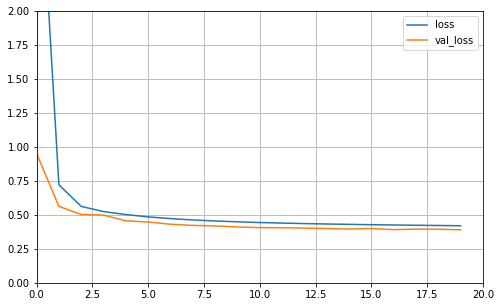

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.axis([0, 20, 0, 2])
plt.show()

In [31]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[0.7333859],
       [1.6742306],
       [3.4325013]], dtype=float32)

# Functional API